# Part One - Create a Small Dataset
## Instructions
Use Python, Numpy, and Matplotlib to load a dataset of 100 images and create a montage of the dataset as a 10 x 10 image using the function below. You'll need to make sure you call the function using a 4-d array of N x H x W x C dimensions, meaning every image will need to be the same size! You can load an existing dataset of images, find your own images, or perhaps create your own images using a creative process such as painting, photography, or something along those lines.

When you are creating your dataset, I want you to think about what representations might exist in the limited amount of data that you are organizing. It is only 100 images after all, not a whole lot for a computer to reason about and learn something meaningful. So think about creating a *dataset* of images that could possibly reveal something fundamental about what is contained in the images. Try to think about creating a set of images that represents something. For instance, this might be images of yourself over time. Or it might be every picture you've ever taken of your cat. Or perhaps the view from your room at different times of the day. Consider making the changes within each image as significant as possible. As "representative" of the thing you want to capture as possible. Hopefully by the end of this lesson, you'll understand a little better the difference between what a computer thinks is significant and what you yourself thought was significant.

The code below will show you how to resize and/or crop your images so that they are 100 pixels x 100 pixels in height and width. Once you have 100 images loaded, we'll use a montage function to draw and save your dataset to the file dataset.png

In [4]:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from libs import utils
    print('Done!')

Done!


In [5]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Bit of formatting because inline code is not styled very good by default:
%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
} </style>""")

In [7]:
dirname='/home/cc/Desktop/pics'

In [8]:
# You need to find 100 images from the web/create them yourself
# or find a dataset that interests you (e.g. I used celeb faces
# in the course lecture...)
# then store them all in a single directory.
# With all the images in a single directory, you can then
# perform the following steps to create a 4-d array of:
# N x H x W x C dimensions as 100 x 100 x 100 x 3.

In [9]:
#Load every image  file in the  provided directory

In [10]:
filenames=[os.path.join(dirname,fname)
          for fname in os.listdir(dirname)]

In [11]:
 # Read every filename as an RGB image
imgs = [plt.imread(fname)[..., :3] for fname in filenames]

In [12]:
imgs[1].shape

(842, 595, 3)

In [13]:
 # Then resize the square image to 100 x 100 pixels
imgs = [resize(img_i, (100, 100)) for img_i in imgs]


In [14]:
imgs[0].shape

(100, 100, 3)

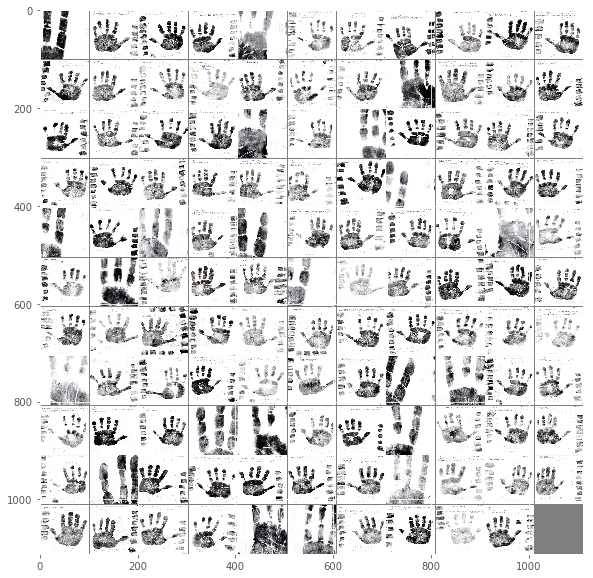

In [15]:

# Plot the resulting dataset:
# Make sure you "run" this cell after you create your `imgs` variable as a 4-D array!
# Make sure we have a 100 x 100 x 100 x 3 dimension array
 
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(imgs, saveto='dataset.png'))
 


In [16]:
# Finally make our list of 3-D images a 4-D array with the first dimension the number of images:
imgs = np.array(imgs).astype(np.float32)

# Part Two - Compute the Mean
## Instructions
First use Tensorflow to define a session. Then use Tensorflow to create an operation which takes your 4-d array and calculates the mean color image (100 x 100 x 3) using the function tf.reduce_mean. Have a look at the documentation for this function to see how it works in order to get the mean of every pixel and get an image of (100 x 100 x 3) as a result. You'll then calculate the mean image by running the operation you create with your session (e.g. sess.run(...)). Finally, plot the mean image, save it, and then include this image in your zip file as mean.png.

(120, 100, 100, 3)
(100, 100, 3)


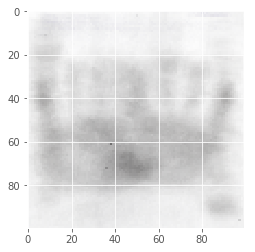

In [17]:
#a) witout   tensorflow
data=np.array(imgs)
print(data.shape)
mean_img=np.mean(data,axis=0)
print(mean_img.shape)
plt.imshow(mean_img)


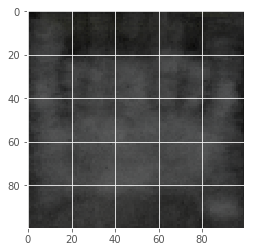

In [18]:
std_img=np.std(data,axis=0)
plt.imshow(std_img)

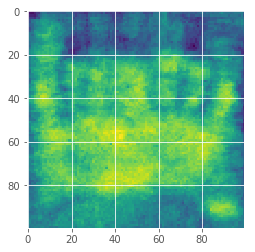

In [19]:

plt.imshow(np.mean(std_img,axis=2))

In [20]:
# First create a tensorflow session
sess = tf.Session()

# Now create an operation that will calculate the mean of your images
mean_img_op = tf.reduce_mean(imgs, 0)

In [21]:
#And  then run the operation  using your session
mean_img=sess.run(mean_img_op)

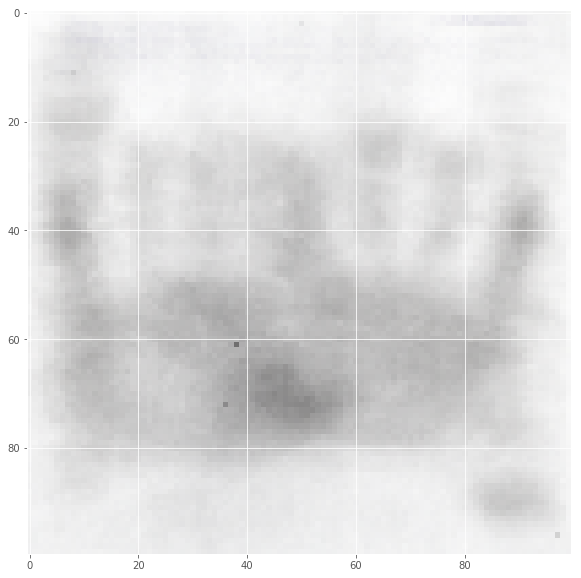

In [22]:
assert(mean_img.shape == (100, 100, 3))
plt.figure(figsize=(10, 10))
plt.imshow(mean_img)
plt.imsave(arr=mean_img, fname='mean.png')

# Part Three - Compute the Standard Deviation

## Instructions

Now use tensorflow to calculate the standard deviation and upload the standard deviation image averaged across color channels as a "jet" heatmap of the 100 images. This will be a little more involved as there is no operation in tensorflow to do this for you. However, you can do this by calculating the mean image of your dataset as a 4-D array. To do this, you could write e.g. mean_img_4d = tf.reduce_mean(imgs, reduction_indices=0, keep_dims=True) to give you a 1 x H x W x C dimension array calculated on the N x H x W x C images variable. The reduction_indices parameter is saying to calculate the mean over the 0th dimension, meaning for every possible H, W, C, or for every pixel, you will have a mean composed over the N possible values it could have had, or what that pixel was for every possible image. This way, you can write images - mean_img_4d to give you a N x H x W x C dimension variable, with every image in your images array having been subtracted by the mean_img_4d. If you calculate the square root of the sum of the squared differences of this resulting operation, you have your standard deviation!

In summary, you'll need to write something like: subtraction = imgs - tf.reduce_mean(imgs, reduction_indices=0, keep_dims=True), then reduce this operation using tf.sqrt(tf.reduce_sum(subtraction * subtraction, reduction_indices=0)) to get your standard deviation then include this image in your zip file as std.png

## Code

In [23]:
# Create a tensorflow operation to give you the standard deviation

# First compute the difference of every image with a
# 4 dimensional mean image shaped 1 x H x W x C
mean_img_4d = tf.reduce_mean(imgs, reduction_indices=0, keep_dims=True)

In [24]:
subtraction = imgs - mean_img_4d

# Now compute the standard deviation by calculating the
# square root of the sum of squared differences
std_img_op = tf.sqrt(tf.reduce_sum(subtraction * subtraction, reduction_indices=0))

# Now calculate the standard deviation using your session
std_img = sess.run(std_img_op)

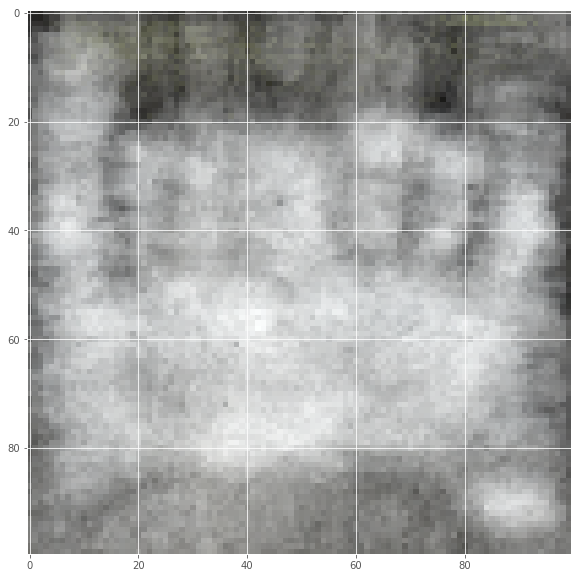

In [25]:
# Then plot the resulting standard deviation image:
# Make sure the std image is the right size!
assert(std_img.shape == (100, 100) or std_img.shape == (100, 100, 3))
plt.figure(figsize=(10, 10))
std_img_show = std_img / np.max(std_img)
plt.imshow(std_img_show)
plt.imsave(arr=std_img_show, fname='std.png')

# Part Four - Normalize the Dataset

## Instructions

Using tensorflow, we'll attempt to normalize your dataset using the mean and standard deviation.

## Code

In [26]:
norm_imgs_op = (imgs - tf.reduce_mean(imgs, 0)) / tf.sqrt(
    tf.reduce_sum(subtraction * subtraction, reduction_indices=0))

In [27]:
norm_imgs = sess.run(norm_imgs_op)
print(np.min(norm_imgs), np.max(norm_imgs))
print(imgs.dtype)

-0.979498 0.201184
float32


In [28]:
len(norm_imgs)

120

In [29]:
norm_imgs[0].shape

(100, 100, 3)

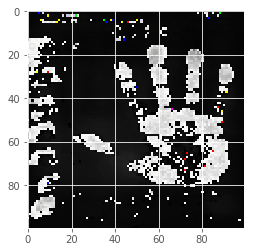

In [30]:
plt.imshow(norm_imgs[13])

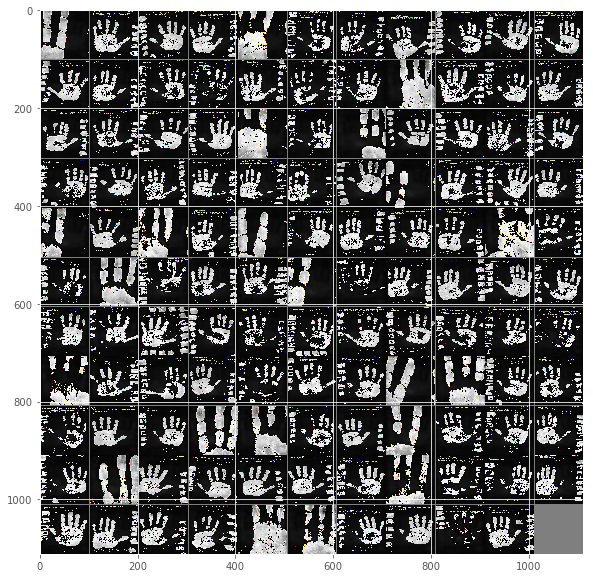

In [31]:
# Then plot the resulting normalized dataset montage:
# Make sure we have a 100 x 100 x 100 x 3 dimension array
 
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(norm_imgs, 'normalized.png'))

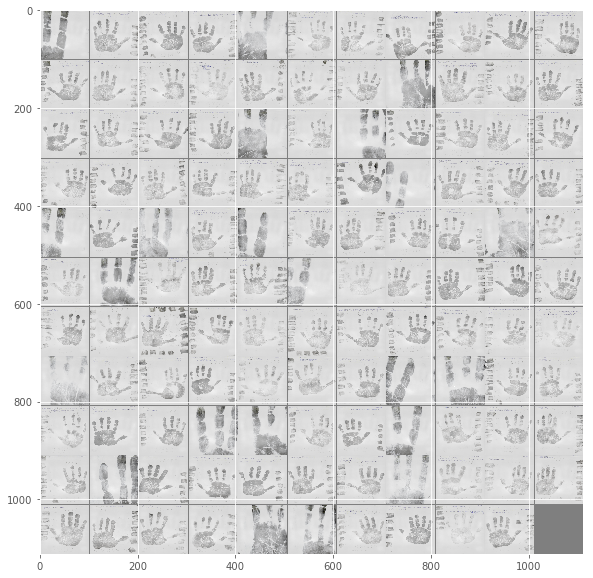

In [32]:

norm_imgs_show = (norm_imgs - np.min(norm_imgs)) / (np.max(norm_imgs) - np.min(norm_imgs))
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(norm_imgs_show, 'normalized.png'))

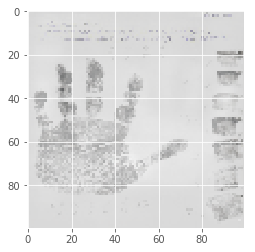

In [33]:
plt.imshow(norm_imgs_show[31])

# Part Five - Convolve the Dataset

## Instructions

Using tensorflow, we'll attempt to convolve your dataset with one of the kernels we created during the lesson, and then in the next part, we'll take the sum of the convolved output to use for sorting. You should use the function utils.gabor to create an edge detector. You can also explore with the utils.gauss2d kernel. What you must figure out is how to reshape your kernel to be 4-dimensional: K_H, K_W, C_I, and C_O, corresponding to the kernel's height and width (e.g. 16), the number of input channels (RGB = 3 input channels), and the number of output channels, (1).

## Code

In [34]:
# First build 3 kernels for each input color channel
ksize = 20
kernel = np.concatenate([utils.gabor(ksize)[:, :, np.newaxis] for i in range(3)], axis=2)

In [35]:
kernel.shape

(20, 20, 3)

In [36]:
# Now make the kernels into the shape: [ksize, ksize, 3, 1]:
kernel_4d = np.reshape(kernel, [ksize, ksize, 3, 1])
assert(kernel_4d.shape == (ksize, ksize, 3, 1))

In [37]:
kernel_4d.shape

(20, 20, 3, 1)

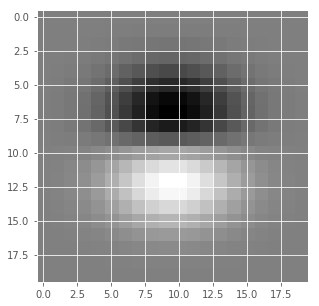

In [38]:
plt.figure(figsize=(5, 5))
plt.imshow(kernel_4d[:, :, 0, 0], cmap='gray')
plt.imsave(arr=kernel_4d[:, :, 0, 0], fname='kernel.png', cmap='gray')

In [39]:

#convolved = utils.convolve(norm_imgs, kernel_4d)

In [40]:
def convolve(img, kernel):
    """Uses Tensorflow to convolve a 4D image with a 4D kernel.

    Parameters
    ----------
    img : np.ndarray
        4-dimensional image shaped N x H x W x C
    kernel : np.ndarray
        4-dimensional image shape K_H, K_W, C_I, C_O corresponding to the
        kernel's height and width, the number of input channels, and the
        number of output channels.  Note that C_I should = C.

    Returns
    -------
    result : np.ndarray
        Convolved result.
    """
    g = tf.Graph()
    with tf.Session(graph=g):
        convolved = tf.nn.conv2d(img, kernel, strides=[1, 1, 1, 1], padding='SAME')
        res = convolved.eval()
    return res

In [54]:
temp=norm_imgs[0].reshape(1,100,100,3)
#convolved = tf.nn.conv2d(temp, kernel_4d, strides=[1, 1, 1, 1], padding='SAME')
g = tf.Graph()
with tf.Session(graph=g):
        convolved = tf.nn.conv2d(temp, kernel_4d, strides=[1, 1, 1, 1], padding='SAME')
        res = convolved.eval()

In [69]:
convolved=norm_imgs
for  img in range(len(norm_imgs)):
 
    current_img=norm_imgs[img].reshape(1,100,100,3)
    convolved[img]=convolve(current_img ,kernel_4d)

(120, 100, 100, 3)


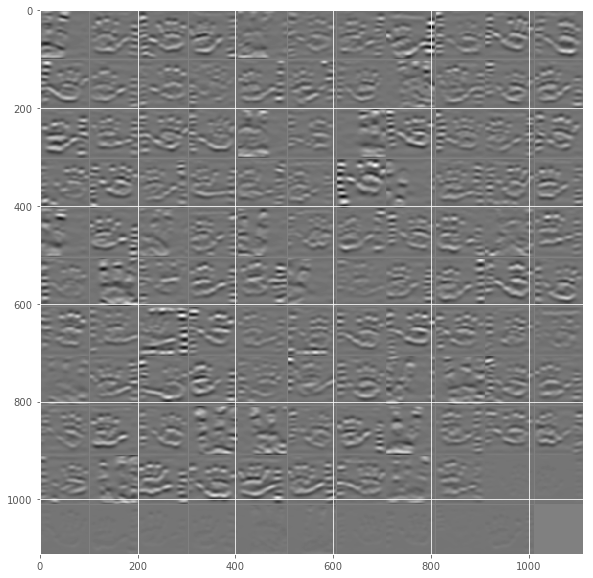

In [71]:
convolved_show = (convolved - np.min(convolved)) / (np.max(convolved) - np.min(convolved))
print(convolved_show.shape)
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(convolved_show[..., 0], 'convolved.png'), cmap='gray')

# Part Six - Sort the Dataset

## Instructions

Using tensorflow, we'll attempt to organize your dataset. We'll try sorting based on the mean value of each convolved image's output to use for sorting. To do this, we could calculate either the sum value (tf.reduce_sum) or the mean value (tf.reduce_mean) of each image in your dataset and then use those values, e.g. stored inside a variable values to sort your images using something like tf.nn.top_k and sorted_imgs = np.array([imgs[idx_i] for idx_i in idxs]) prior to creating the montage image, m = montage(sorted_imgs, "sorted.png") and then include this image in your zip file as sorted.png

## Code

In [75]:
flattened = tf.reshape(convolved, [120, 30000])
 

In [77]:
# Now calculate some statistics about each of our images
values = tf.reduce_sum(flattened, reduction_indices=1)

# Then create another operation which sorts those values
# and then calculate the result:
idxs_op = tf.nn.top_k(values, k=120)[1]
idxs = sess.run(idxs_op)

# Then finally use the sorted indices to sort your images:
sorted_imgs = np.array([imgs[idx_i] for idx_i in idxs])

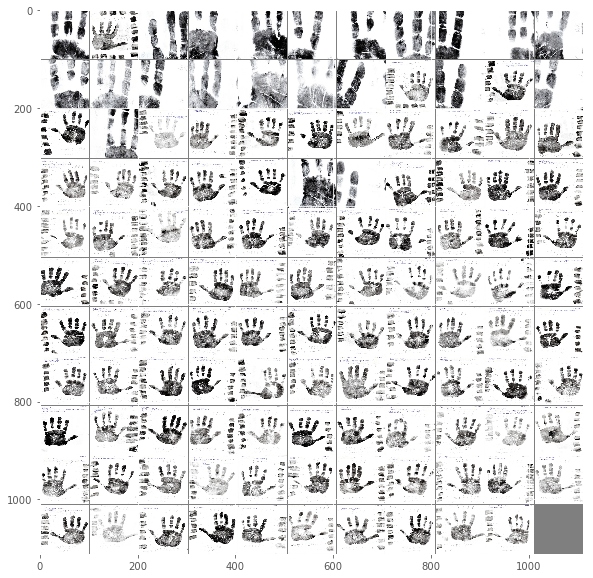

In [78]:
plt.figure(figsize=(10, 10))
plt.imshow(utils.montage(sorted_imgs, 'sorted.png'))

In [79]:
utils.build_submission('session-1.zip',
                       ('dataset.png',
                        'mean.png',
                        'std.png',
                        'normalized.png',
                        'kernel.png',
                        'convolved.png',
                        'sorted.png',
                        'session-1.ipynb'))

It looks like you have completed each part!
Great job!!!
Now submit the file:
/media/cc/A80C461E0C45E7C0/Creative-Applications-Deep-Learning-1/project_1/session-1.zip
to Kadenze for grading!
